# Player Unknown Battle Ground

### Data fields
`DBNOs` - Number of enemy players knocked.  
`assists` - Number of enemy players this player damaged that were killed by teammates.  
`boosts` - Number of boost items used.  
`damageDealt` - Total damage dealt. Note: Self inflicted damage is subtracted.  
`headshotKills` - Number of enemy players killed with headshots.  
`heals` - Number of healing items used.  
`Id` - Player’s Id
`killPlace` - Ranking in match of number of enemy players killed.  
`killPoints` - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.  
`killStreaks` - Max number of enemy players killed in a short amount of time.  
`kills` - Number of enemy players killed.  
`longestKill` - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.  
`matchDuration` - Duration of match in seconds.  
`matchId` - ID to identify match. There are no matches that are in both the training and testing set.  
`matchType` - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.  
`rankPoints` - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.  
`revives` - Number of times this player revived teammates.  
rideDistance - Total distance traveled in vehicles measured in meters.  
`roadKills` - Number of kills while in a vehicle.  
`swimDistance` - Total distance traveled by swimming measured in meters.  
`teamKills` - Number of times this player killed a teammate.  
`vehicleDestroys` - Number of vehicles destroyed.  
`walkDistance` - Total distance traveled on foot measured in meters.  
`weaponsAcquired` - Number of weapons picked up.
`winPoints` - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
`groupId` - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.  
`numGroups` - Number of groups we have data for in the match.  
`maxPlace` - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.  
`winPlacePerc` - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

# Drive 연결

In [1]:
from google.colab import drive

In [2]:
drive.mount('./content')

Mounted at ./content


# kaggle 데이터 다운로드

In [ ]:
#pip install kaggle

In [6]:
import os

In [7]:
os.environ['KAGGLE_USERNAME'] = 'mabcde'
os.environ["KAGGLE_KEY"] = 'feaa37f21ae299c52686bcc037160e50'

In [29]:
!kaggle competitions download -c pubg-finish-placement-prediction

 96% 348M/361M [00:02<00:00, 142MB/s]
100% 361M/361M [00:02<00:00, 155MB/s]


In [23]:
ls content/MyDrive/'Colab Notebooks'/data

preprocessed_test.csv   sample_submission.csv  submission.csv
preprocessed_train.csv  submission123.csv


In [45]:
source = "pubg-finish-placement-prediction.zip"
destination = "/content/MyDrive/Colab Notebooks/data/"

In [26]:
import shutil

In [46]:
shutil.move(source, destination)

'/content/MyDrive/Colab Notebooks/data/pubg-finish-placement-prediction.zip'

In [50]:
ls content/MyDrive/"Colab Notebooks"/data

preprocessed_test.csv   pubg-finish-placement-prediction.zip  submission123.csv
preprocessed_train.csv  sample_submission.csv                 submission.csv


In [53]:
!unzip content/MyDrive/"Colab Notebooks"/data/pubg-finish-placement-prediction.zip -d content/MyDrive/"Colab Notebooks"/data/

Archive:  content/MyDrive/Colab Notebooks/data/pubg-finish-placement-prediction.zip
  inflating: content/MyDrive/Colab Notebooks/data/sample_submission_V2.csv  
  inflating: content/MyDrive/Colab Notebooks/data/test_V2.csv  
  inflating: content/MyDrive/Colab Notebooks/data/train_V2.csv  


In [54]:
ls content/MyDrive/"Colab Notebooks"/data

preprocessed_test.csv                 sample_submission.csv     submission.csv
preprocessed_train.csv                sample_submission_V2.csv  test_V2.csv
pubg-finish-placement-prediction.zip  submission123.csv         train_V2.csv


In [55]:
path = 'content/MyDrive/Colab Notebooks/data'

# 데이터 불러오기

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
train_df = pd.read_csv(path + "/train_V2.csv")
test_df = pd.read_csv(path + "/test_V2.csv")

In [66]:
train_df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [65]:
test_df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,...,1500,0,0.0,0,0.000,0,0,588.00,1,0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,...,1503,2,4669.0,0,0.000,0,0,2017.00,6,0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,...,1565,0,0.0,0,0.000,0,0,787.80,4,0
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,...,1465,0,0.0,0,0.000,0,0,1812.00,3,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,...,1480,1,0.0,0,0.000,0,0,2963.00,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934169,a316c3a13887d5,80e82180c90951,f276da5fd73536,1,2,381.00,3,0,7,4,...,-1,1,0.0,0,0.000,0,0,1799.00,5,1526
1934170,5312146b27d875,147264a127c56e,fb77cbfe094a6b,0,0,0.00,0,0,0,64,...,-1,0,0.0,0,0.000,0,0,1195.00,3,1496
1934171,fc8818b5b32ad3,7bbb4779ebedd5,efb74d5f6e9779,0,0,91.96,0,0,3,24,...,1482,0,0.0,0,7.798,1,0,3327.00,3,0
1934172,a0f91e35f8458f,149a506a64c2b1,3a2cf335bc302f,1,2,138.60,0,0,12,25,...,1456,1,0.0,0,0.000,0,0,1893.00,4,0


# Preparation for Machine Learning

In [64]:
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import LabelEncoder, StandardScaler
from pandas.api.types import is_string_dtype, is_numeric_dtype
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import export_graphviz

In [67]:
sample = 500000

In [70]:
sampled_df = train_df.sample(n=sample)
sampled_df.shape

(500000, 29)

In [81]:
X = sampled_df.drop(columns = ['Id', 'groupId', 'matchId', 'matchType', 'winPlacePerc'])
y = sampled_df['winPlacePerc']

In [79]:
X.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints'],
      dtype='object')

In [82]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 3350763 to 1302003
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   assists          500000 non-null  int64  
 1   boosts           500000 non-null  int64  
 2   damageDealt      500000 non-null  float64
 3   DBNOs            500000 non-null  int64  
 4   headshotKills    500000 non-null  int64  
 5   heals            500000 non-null  int64  
 6   killPlace        500000 non-null  int64  
 7   killPoints       500000 non-null  int64  
 8   kills            500000 non-null  int64  
 9   killStreaks      500000 non-null  int64  
 10  longestKill      500000 non-null  float64
 11  matchDuration    500000 non-null  int64  
 12  maxPlace         500000 non-null  int64  
 13  numGroups        500000 non-null  int64  
 14  rankPoints       500000 non-null  int64  
 15  revives          500000 non-null  int64  
 16  rideDistance     500000 non-nul

# split

In [74]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=True, shuffle=True)

# Set metrics (MAE)
> This is the metric used by Kaggle in this competition


In [77]:
from sklearn.metrics import mean_absolute_error

def print_score(m : RandomForestRegressor):
    res = ['mae train: ', mean_absolute_error(m.predict(X_train), y_train),
           'mae val: ', mean_absolute_error(m.predict(X_val), y_val)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

# First basic Random Forest Mode

In [84]:
# 24개의 columns
m1 = RandomForestRegressor(n_estimators=40, min_samples_leaf=3,
                           max_features='sqrt', n_jobs=-1)
m1.fit(X_train, y_train)
print_score(m1)

['mae train: ', 0.043680157407266, 'mae val: ', 0.06432627794497543]


In [86]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [87]:
fi = rf_feat_importance(m1, X); fi[:10]

,cols,imp
21,walkDistance,0.279300
6,killPlace,0.253619
1,boosts,0.097748
22,weaponsAcquired,0.083206
5,heals,0.065996
10,longestKill,0.046114
16,rideDistance,0.035954
2,damageDealt,0.020433
8,kills,0.019933
9,killStreaks,0.017218


In [88]:
fi.shape

(24, 2)

# 시각화 팔레트 설정

In [100]:
my_palette = sns.color_palette(palette="rainbow", n_colors=24, as_cmap=True)

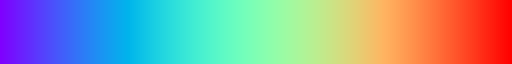

In [101]:
my_palette

In [103]:
colors = ['#FF0000', '#FF9900', '#FFFF00', '#00FF00', '#00FFFF', '#0000FF',
          '#9900FF', '#FF00FF', '#FF3366', '#FF6633', '#FFCC00', '#99FF00',
          '#33FF99', '#00FFCC', '#0099FF', '#3300FF', '#9900CC', '#FF0099',
          '#FF6600', '#FFCC33', '#CCFF00', '#66FF00', '#33CCFF', '#990066']

In [110]:
sns.set_style('whitegrid')

<Axes: ylabel='cols'>

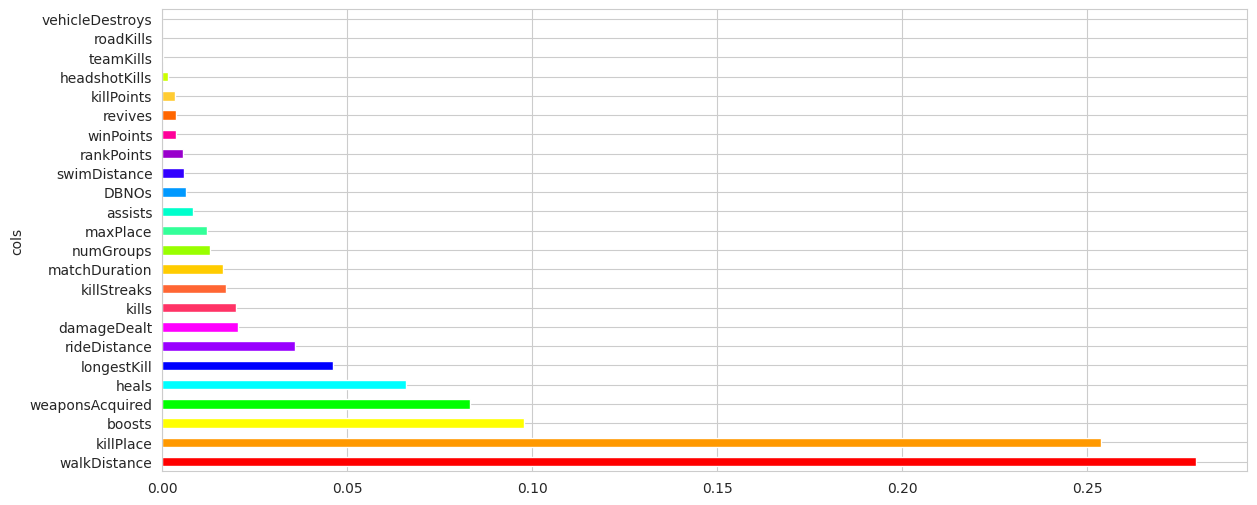

In [112]:
plot1 = fi.plot('cols', 'imp', figsize=(14,6),
                legend=False, kind = 'barh',
                color=colors)
plot1

In [113]:
fi

,cols,imp
21,walkDistance,0.279300
6,killPlace,0.253619
1,boosts,0.097748
22,weaponsAcquired,0.083206
5,heals,0.065996
10,longestKill,0.046114
16,rideDistance,0.035954
2,damageDealt,0.020433
8,kills,0.019933
9,killStreaks,0.017218


In [114]:
to_keep = fi[fi.imp>0.005].cols
print('Significant features: ', len(to_keep))
to_keep

Significant features:  17


21       walkDistance
6           killPlace
1              boosts
22    weaponsAcquired
5               heals
10        longestKill
16       rideDistance
2         damageDealt
8               kills
9         killStreaks
11      matchDuration
13          numGroups
12           maxPlace
0             assists
3               DBNOs
18       swimDistance
14         rankPoints
Name: cols, dtype: object

In [115]:
df_keep = X[to_keep].copy()

# Second Random Forest Model

In [116]:
X_train2, X_val2, y_train2, y_val2 = train_test_split(df_keep, y, test_size=.2, random_state=1, shuffle=True)

In [117]:
def print_score(m : RandomForestRegressor, X_train, X_val, y_train, y_val):
    res = ['mae train: ', mean_absolute_error(m.predict(X_train), y_train),
           'mae val: ', mean_absolute_error(m.predict(X_val), y_val)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [118]:
m2 = RandomForestRegressor(n_estimators=80, min_samples_leaf=3, max_features='sqrt',
                          n_jobs=-1)
m2.fit(X_train2, y_train2)
print_score(m2, X_train2, X_val2, y_train2, y_val2 )

['mae train: ', 0.04004212247030413, 'mae val: ', 0.06201882785940821]


<Axes: ylabel='cols'>

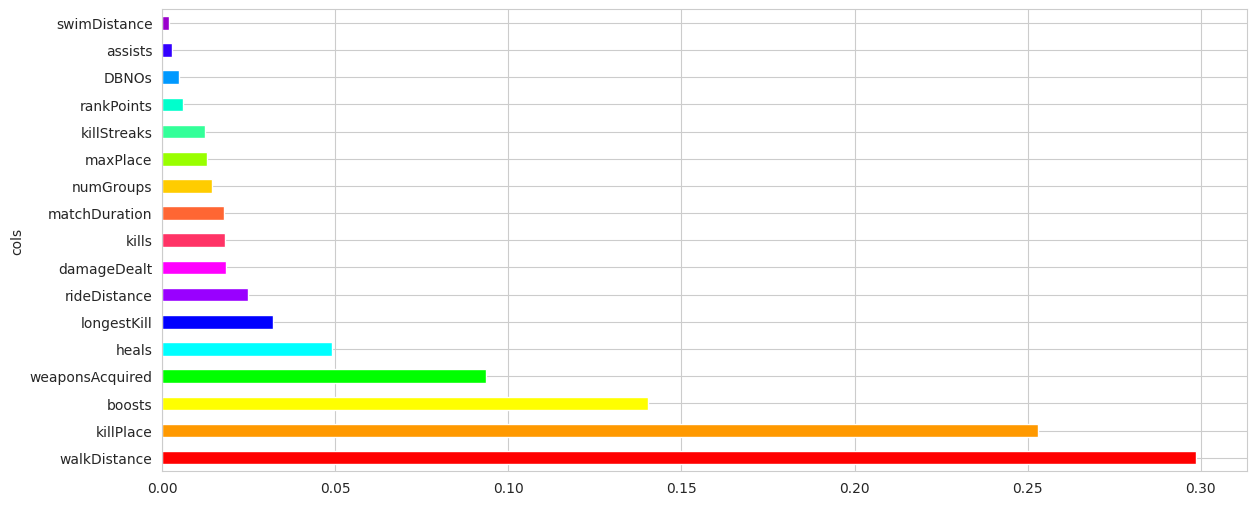

In [119]:
fi_to_keep = rf_feat_importance(m2, df_keep)
plot2 = fi_to_keep.plot('cols', 'imp', figsize=(14,6), legend=False, kind = 'barh', color=colors)
plot2

In [121]:
fi_to_keep.shape

(17, 2)

In [ ]:
# png 저장 방법
#fig = plot2.get_figure()
#fig.savefig("Feature_importances(TopFeatures).png")

# Correlations

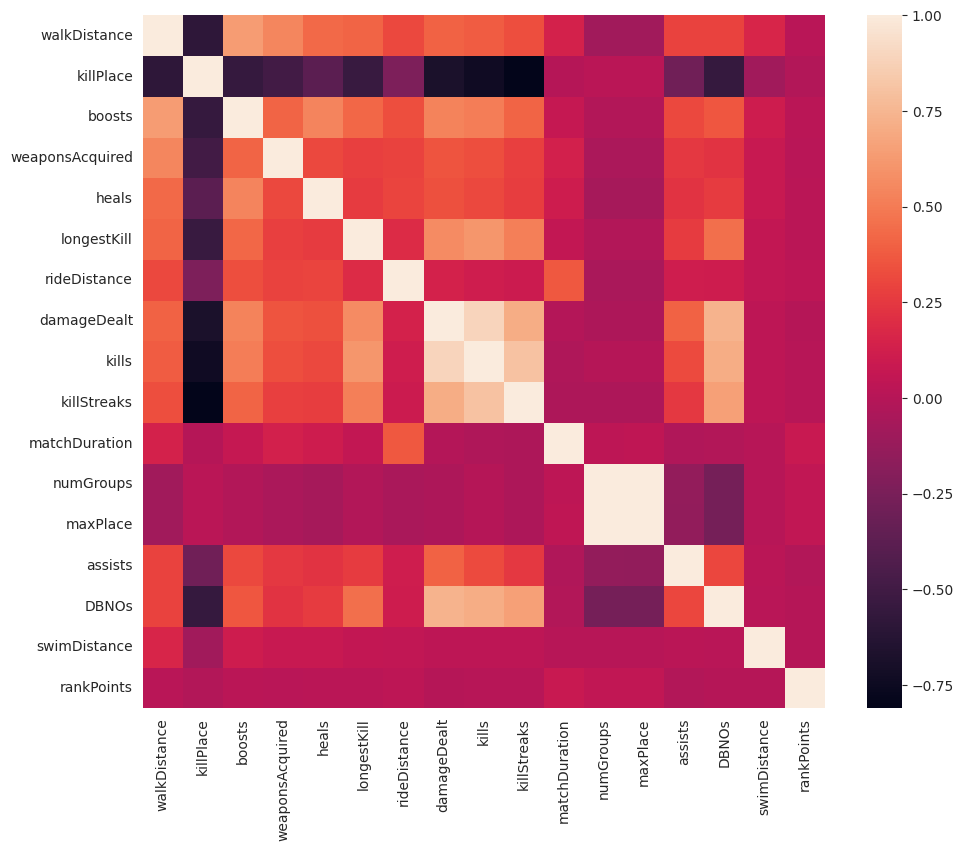

In [122]:
f, ax = plt.subplots(figsize=(11, 9))

# Create heatmap
heatmap = sns.heatmap(df_keep.corr())

### dendrogram

In [123]:
import scipy
from scipy.cluster import hierarchy as hc

[]

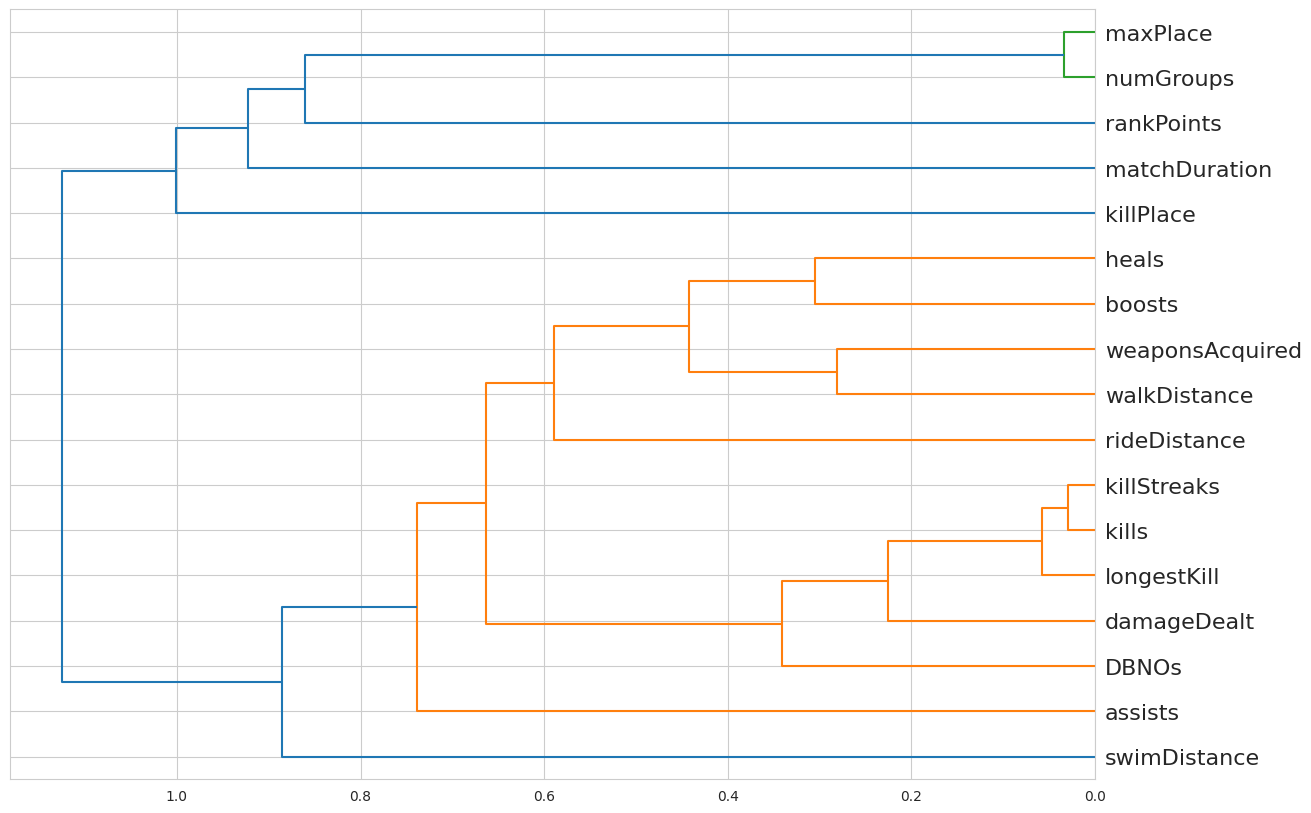

In [136]:
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')

fig = plt.figure(figsize=(14,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, orientation='left', leaf_font_size=16)
plt.plot()

In [131]:
corr.shape, corr_condensed.shape, z.shape

((17, 17), (136,), (16, 4))

### Dendro gram, Heatmap 이미지로 저장

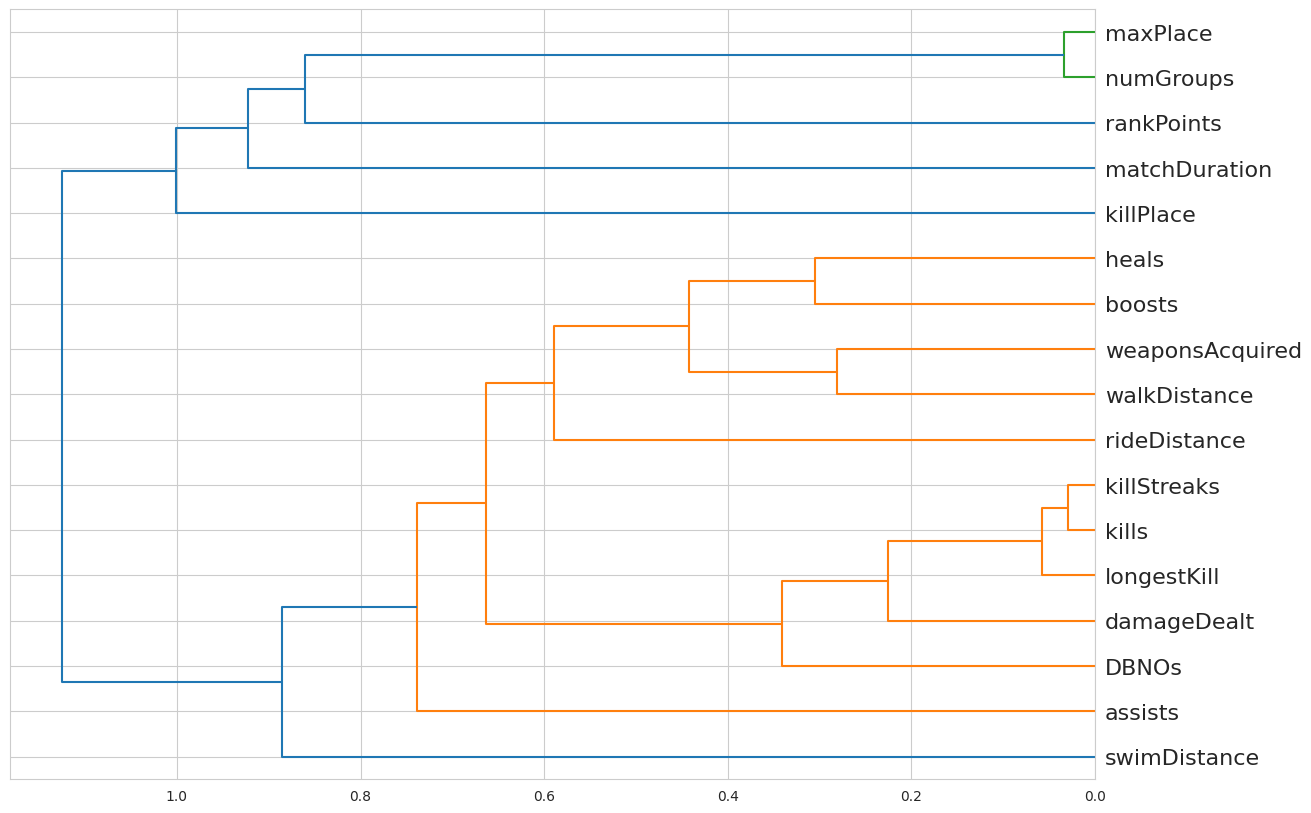

In [140]:
fig = plt.figure(figsize=(14,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, orientation='left', leaf_font_size=16)
plt.savefig('Dendrogram.png', transparent=False)

In [134]:
fig = heatmap.get_figure()
fig.savefig("Heatmap(TopFeatures).png")

### gg plot
> The Grammar of Graphics plot

In [153]:
from plotnine import ggplot, aes, geom_point, stat_smooth

In [154]:
def get_sample(df,n):
    idxs = sorted(np.random.permutation(len(df))[:n])
    return df.iloc[idxs].copy()

### Predictive quality of kills

/usr/local/lib/python3.10/dist-packages/plotnine/stats/stat_smooth.py:182: PlotnineWarning: No 'window' specified in the method_args. Using window = 10000. The same window is used for all groups or facets


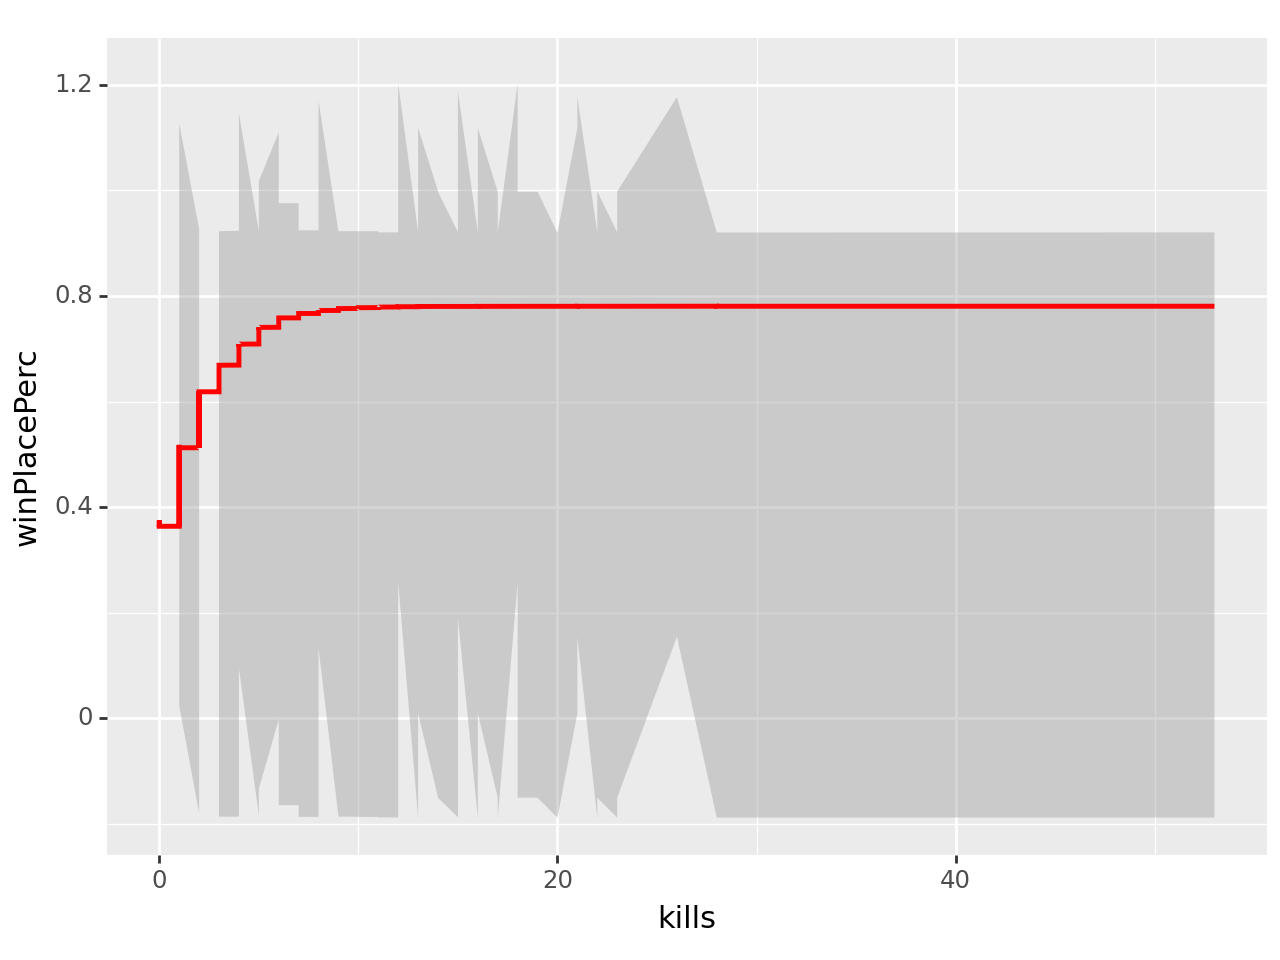

<Figure Size: (640 x 480)>

In [155]:
x_all = get_sample(train_df, 100000)
ggplot(x_all, aes('kills','winPlacePerc'))+ stat_smooth(se=True, colour='red', method='mavg')

### Predictive quality of walkDistance

/usr/local/lib/python3.10/dist-packages/plotnine/stats/stat_smooth.py:182: PlotnineWarning: No 'window' specified in the method_args. Using window = 10000. The same window is used for all groups or facets


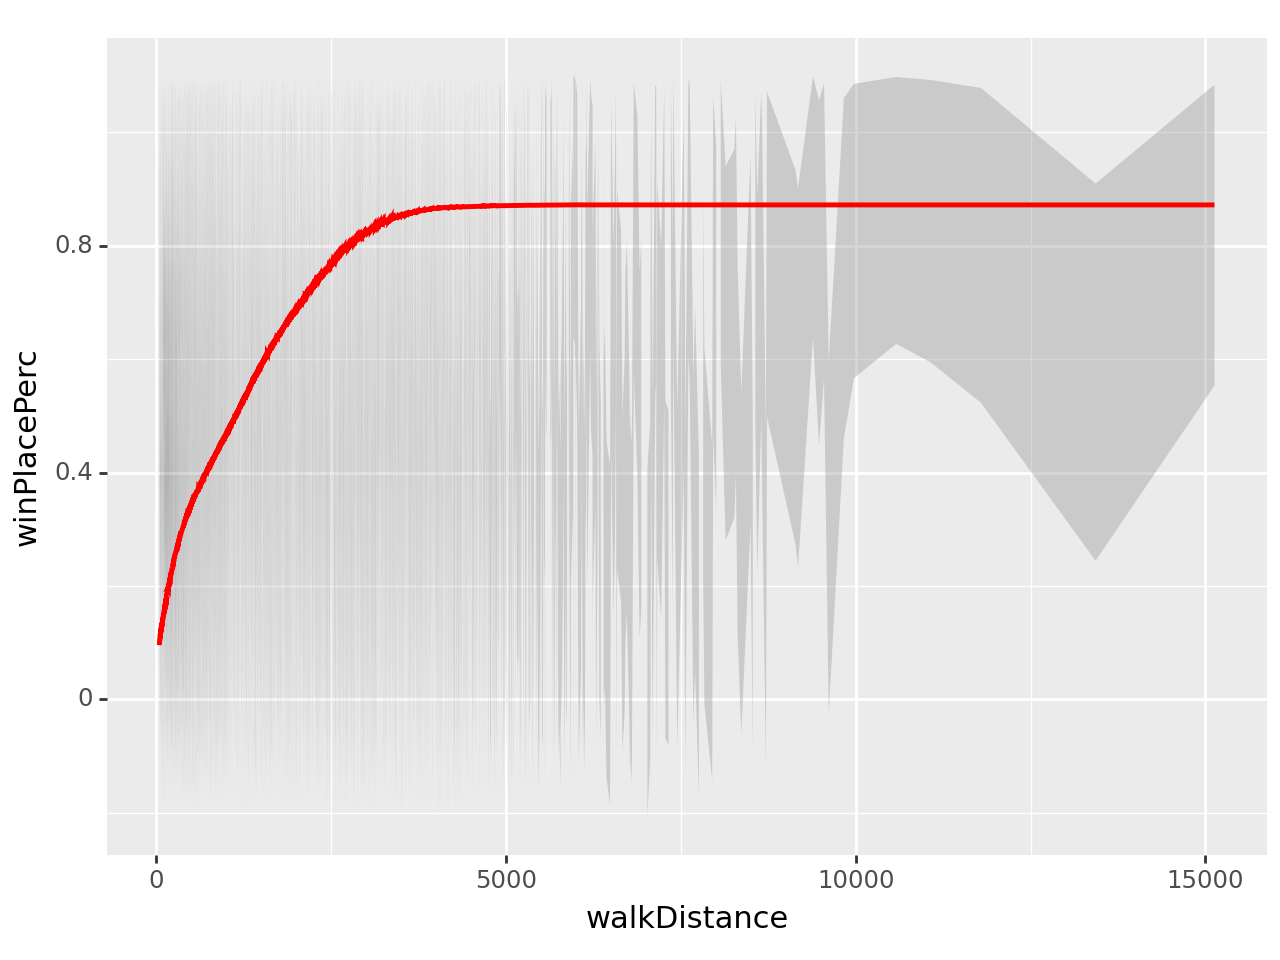

<Figure Size: (640 x 480)>

In [156]:
x_all = get_sample(train_df, 100000)
ggplot(x_all, aes('walkDistance','winPlacePerc')) + stat_smooth(se=True, colour='red', method='mavg')

### Final Random Forest Model

In [132]:
m3 = RandomForestRegressor(n_estimators=70, min_samples_leaf=3, max_features=0.5,
                          n_jobs=-1)
m3.fit(X_train2, y_train2)
print_score(m3, X_train2, X_val2, y_train2, y_val2 )

['mae train: ', 0.03494204634904325, 'mae val: ', 0.06055949497511965]


### Submission

In [141]:
test = test_df.copy()

In [146]:
train_df['playersJoined'] = train_df.groupby('matchId')['matchId'].transform('count')

In [147]:
# Add engineered features to the test set
test['headshot_rate'] = test['headshotKills'] / test['kills']
test['headshot_rate'] = test['headshot_rate'].fillna(0)
test['totalDistance'] = test['rideDistance'] + test['walkDistance'] + test['swimDistance']
test['playersJoined'] = test.groupby('matchId')['matchId'].transform('count')
test['killsNorm'] = test['kills']*((100-test['playersJoined'])/100 + 1)
test['damageDealtNorm'] = test['damageDealt']*((100-test['playersJoined'])/100 + 1)
test['maxPlaceNorm'] = test['maxPlace']*((100-train_df['playersJoined'])/100 + 1)
test['matchDurationNorm'] = test['matchDuration']*((100-test['playersJoined'])/100 + 1)
test['healsandboosts'] = test['heals'] + test['boosts']
test['killsWithoutMoving'] = ((test['kills'] > 0) & (test['totalDistance'] == 0))

# Turn groupId and match Id into categorical types
test['groupId'] = test['groupId'].astype('category')
test['matchId'] = test['matchId'].astype('category')

# Get category coding for groupId and matchID
test['groupId_cat'] = test['groupId'].cat.codes
test['matchId_cat'] = test['matchId'].cat.codes

# Remove irrelevant features from the test set
test_pred = test[to_keep].copy()

# Fill NaN with 0 (temporary)
test_pred.fillna(0, inplace=True)
test_pred.head()

,walkDistance,killPlace,boosts,weaponsAcquired,heals,longestKill,rideDistance,damageDealt,kills,killStreaks,matchDuration,numGroups,maxPlace,assists,DBNOs,swimDistance,rankPoints
0,588.0,73,0,1,0,0.00,0.0,51.46,0,0,1884,28,28,0,0,0.0,1500
1,2017.0,11,4,6,2,361.90,4669.0,179.10,2,1,1811,47,48,0,0,0.0,1503
2,787.8,49,0,4,4,0.00,0.0,23.40,0,0,1793,27,28,1,0,0.0,1565
3,1812.0,54,0,3,0,0.00,0.0,65.52,0,0,1834,44,45,0,0,0.0,1465
4,2963.0,7,4,4,1,60.06,0.0,330.20,3,1,1326,27,28,0,1,0.0,1480


In [148]:
predictions = np.clip(a = m3.predict(test_pred), a_min = 0.0, a_max = 1.0)
pred_df = pd.DataFrame({'Id' : test['Id'], 'winPlacePerc' : predictions})

In [149]:
pred_df

,Id,winPlacePerc
0,9329eb41e215eb,0.238456
1,639bd0dcd7bda8,0.905569
2,63d5c8ef8dfe91,0.717816
3,cf5b81422591d1,0.541196
4,ee6a295187ba21,0.932475
...,...,...
1934169,a316c3a13887d5,0.730537
1934170,5312146b27d875,0.446375
1934171,fc8818b5b32ad3,0.892083
1934172,a0f91e35f8458f,0.847080


In [152]:
pred_df.to_csv("submission.csv", index=False)